In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import json
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


In [6]:
with open('/content/drive/MyDrive/Taller4_Caso_real_NYC/Caso NYC/data/borough_data.json') as f:
    borough_data=json.load(f)
    
borough_data

{'brooklyn': {'area': 70.82, 'name': 'brooklyn', 'population': 2648771.0},
 'manhattan': {'area': 22.83, 'name': 'manhattan', 'population': 1664727.0},
 'queens': {'area': 108.53, 'name': 'queens', 'population': 2358582.0},
 'staten island': {'area': 58.37,
  'name': 'staten island',
  'population': 479458.0},
 'the bronx': {'area': 42.1, 'name': 'the bronx', 'population': 1471160.0}}

In [7]:
with open('/content/drive/MyDrive/Taller4_Caso_real_NYC/Caso NYC/data/accidents.csv') as f:
    df=pd.read_csv(f, delimiter=';')
type(df)

pandas.core.frame.DataFrame

In [8]:
df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,NaN,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3988123,Sedan,NaN,NaN,NaN,NaN
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3987962,Sedan,NaN,NaN,NaN,NaN
2,08/22/2019,19:30,QUEENS,11101.0,40.755490,-73.939530,NaN,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4193132,Sedan,NaN,NaN,NaN,NaN
3,09/23/2018,13:10,QUEENS,11367.0,NaN,NaN,MAIN STREET,0,0,1,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3985962,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.901270,NaN,0,0,0,0,1,0,View Obstructed/Limited,Unspecified,NaN,NaN,NaN,4192111,Sedan,Sedan,NaN,NaN,NaN


**PUNTO 1**

¿Cuáles de estas iniciativas podrían beneficiarse directamente de un análisis de los datos proporcionados? 

°Auditorías de seguridad vial en lugares de alto riesgo

°Iniciativas específicas de educación y sensibilización

**Punto 2**

¿Ha aumentado el número de accidentes durante el último año y medio?

No, a mediados del segundo trimestre del 2019 se vio un alza en los accidentes pero para el comienzo del siguiente año aun con sus respectivos picos y valles se puede notar una relaiva disminucion en la cantidad de accidentes.

Text(0, 0.5, 'Accidentes totales')

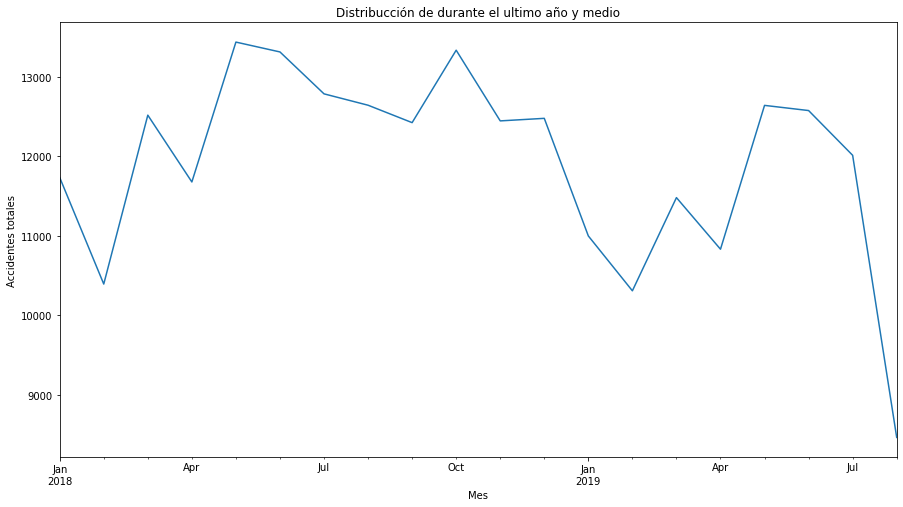

In [9]:
df['DATE']= pd.to_datetime(df['DATE'])

accidentes_mes= df.groupby(df['DATE'].dt.to_period('M')).size()

accidentes_mes.plot.line(figsize=(15,8))

plt.title("Distribucción de durante el ultimo año y medio")
plt.xlabel("Mes")
plt.ylabel("Accidentes totales")

**Punto 3**

**¿qué meses parecen tener el menor número de accidentes?**

Aparentemente los meses con menos accidentes son los primeros meses del año

**¿Cuáles crees que son las razones detrás de esto?**

El invierno en USA

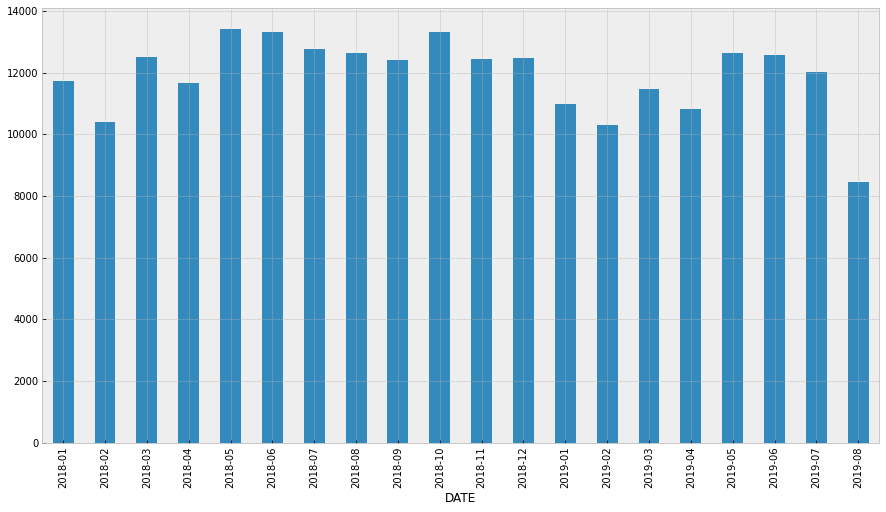

In [ ]:
df['DATE']= pd.to_datetime(df['DATE'])

accidentes_mes= df.groupby(df['DATE'].dt.to_period('M')).size()
accidentes_mes.plot.bar(figsize=(15,8))

plt.title("Distribucción de accidentes por horas")
plt.xlabel("Hora")
plt.ylabel("Accidentes totales")

**PUNTO 4**

**¿Cómo varía el número de accidentes a lo largo de un solo día?**

El primer pico se da a las 8 correspondiente al commienzo de clases y al horario laboral.

EL pico mas grande de accidentes se da a las 4 de la tarde y podria relacionarse con la salida de los estudiantes de colegio e universidad

Y el pico decrece a partir de esa hora.

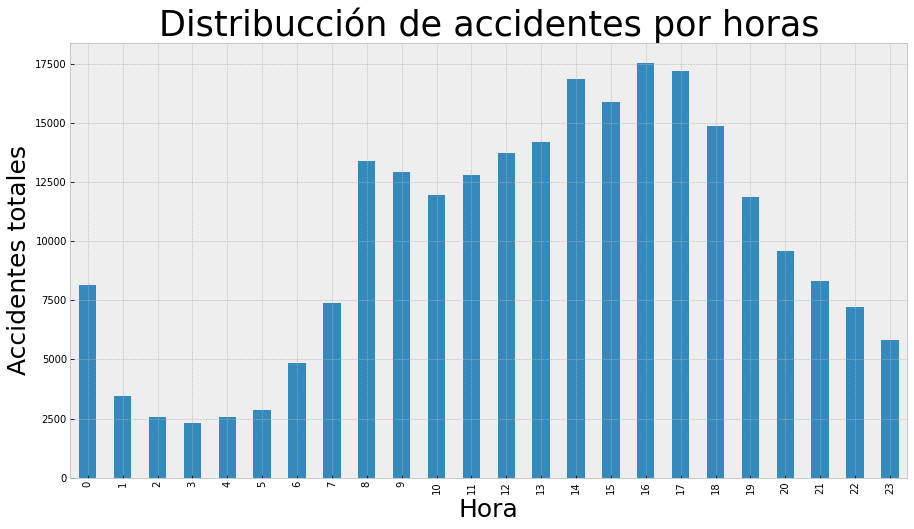

In [ ]:
df['TIME']=pd.to_datetime(df['TIME'])
t= df['TIME'].dt.hour
df= df.assign(HOUR=t.values)

accidentes_hora= df.groupby('HOUR').size()
accidentes_hora.plot.bar(accidentes_hora.index,accidentes_hora.values)

plt.rcParams['figure.figsize'] = (15,8)

plt.title("Distribucción de accidentes por horas")
plt.xlabel("Hora")
plt.ylabel("Accidentes totales")

parameters = {'axes.labelsize': 25,'axes.titlesize': 35}

plt.rcParams.update(parameters)


**PUNTO 5**

En la pregunta anterior hemos agregado el número de accidentes por hora sin tener en cuenta la fecha y el lugar en que ocurrieron. 

**¿Qué crítica le daría a este enfoque?**

Se podria criticar el hecho de que dependiendo de la fecha hay mayor transito de las personas por vacaciones o festividades por lo que la probabilidad de accidentes incrementaria.

Seria util tener encuenta las fechas con mayores incidentes y ver si coinciden con alguna festividad importante que puede variar de un barrio a otro por la diversidad cultural.



**PUNTO 6**

**¿Cómo varía el número de accidentes en una sola semana?**

La cantidad de accidentes se mantiene estable pero se tiene un pico los viernes lo cual podria estar relacionado al inicio del fin de semana y el cansancio de la semana.

Y los accidentes decrecen dramaticamente el fin de semana.

La semana comienza en LUNES representado por 0 y termina el DOMINGO representado por 6


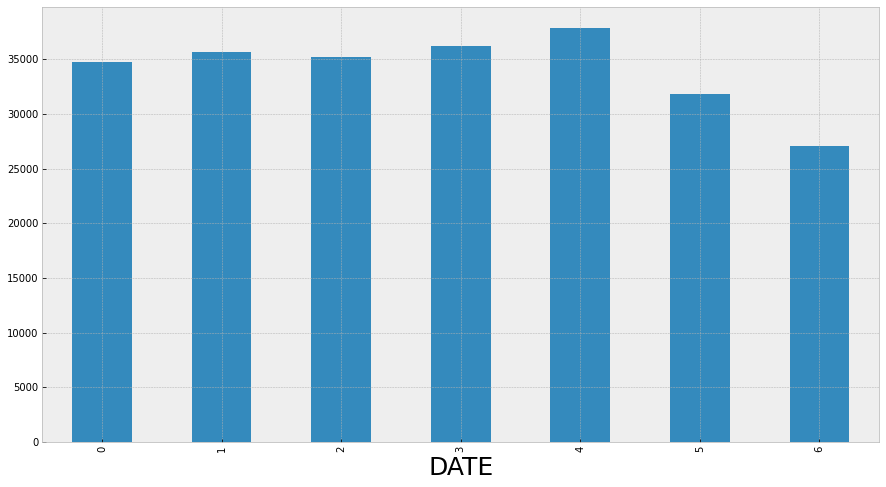

In [ ]:
df['DATE']= pd.to_datetime(df['DATE'])

accidentes_semanales= df.groupby(df['DATE'].dt.weekday).size()
accidentes_semanales.plot.bar()

print("La semana comienza en LUNES representado por 0 y termina el DOMINGO representado por 6")

**PUNTO 7**

Trace una gráfica de barras del número total de accidentes en cada municipio, así como uno de los accidentes por milla cuadrada por municipio. 

**¿Qué puedes concluir?**

Los datos de una grafica a otra varia bastante por lo que es necesaria mas información para llegar a una conclusion.

In [10]:
with open('/content/drive/MyDrive/Taller4_Caso_real_NYC/Caso NYC/data/borough_data.json') as f:
    dj=pd.read_csv(f, delimiter=';')
type(dj)

pandas.core.frame.DataFrame

In [11]:
print("BROOKLYN")
BROOKLYN = (76253 / 70.82)
print(BROOKLYN)
print("--------------------")
print("QUEENS")
QUEENS = (67120/108.53)
print(QUEENS)
print("--------------------")
print("MANHATTAN")
MANHATTAN = (48749/22.83)
print(MANHATTAN)
print("--------------------")
print("BRONX")
BRONX = (37709/42.1)
print(BRONX)
print("--------------------")
print("STATEN_ISLAND")
STATEN_ISLAND = (8691/58.37)
print(STATEN_ISLAND)

BROOKLYN
1076.7156170573285
--------------------
QUEENS
618.4465124850271
--------------------
MANHATTAN
2135.304424003504
--------------------
BRONX
895.7007125890736
--------------------
STATEN_ISLAND
148.89498029809835


Text(0.5, 1.0, 'Accidentes Milla Cuadrada')

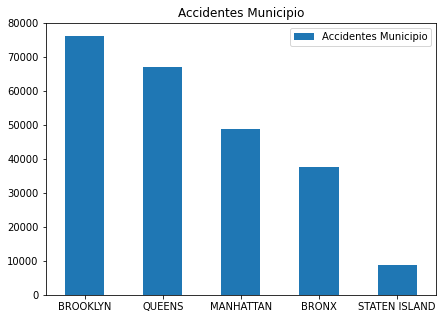

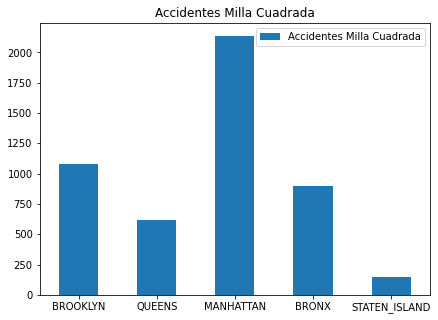

In [12]:
plt.rcParams['figure.figsize'] = (7,5)
dt2 = [BROOKLYN,QUEENS,MANHATTAN,BRONX,STATEN_ISLAND]
index = ['BROOKLYN','QUEENS','MANHATTAN','BRONX','STATEN_ISLAND']
df1 = pd.DataFrame({'Accidentes Milla Cuadrada': dt2}, index=index)
Accidentes_Municipio = df['BOROUGH'].value_counts()
Accidentes_Municipio.plot.bar(rot=0)
plt.legend(["Accidentes Municipio"])
plt.title("Accidentes Municipio")
df1.plot.bar(rot=0)
plt.title("Accidentes Milla Cuadrada")